In [1]:
#Bank Customer Churn Prediction
#This project is made as a part of Data Science course, ML blok, Supervised Learning section.

#The goal of this work is to build different ML models that predict the churn of the bank's customers.

#During the work we will cover the next areas:

#EDA
#Visualisation
#Building ML models and testing them


#Models for evaluation will be the following:

#Logistic Regression
#Random Forest
#Boosting


#Metrics for evaluation are: 

# Recall Score 
# Precision Score
# F1 Score 
# Roc_Auc Score

#Also performance of every model will be evaluated with cross-validation test


In [2]:
#Installing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns #use
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
#CWD
%cd C:/Users/Public/Portfolio/2 Predicting Churn for Bank Customers

C:\Users\Public\Portfolio\2 Predicting Churn for Bank Customers


In [4]:
#Reading dataset
df = pd.read_csv('./data/Churn_Modelling.csv')
print(f'The dataset has',df.shape[0],'rows and',df.shape[1],'columns')

The dataset has 10000 rows and 14 columns


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


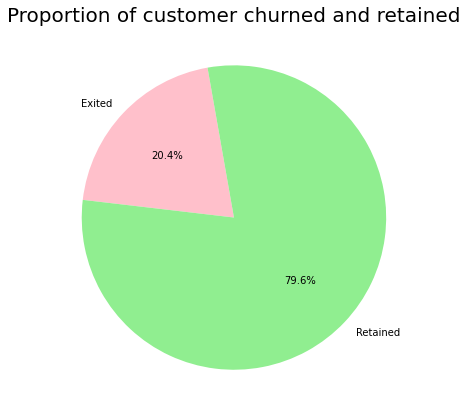

In [6]:
#What proportion of clients have churned
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
colors = ['pink','lightgreen']
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors, startangle=100)
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

#Nearly 20% of the customer have left the bank

In [7]:
#In numeric values
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

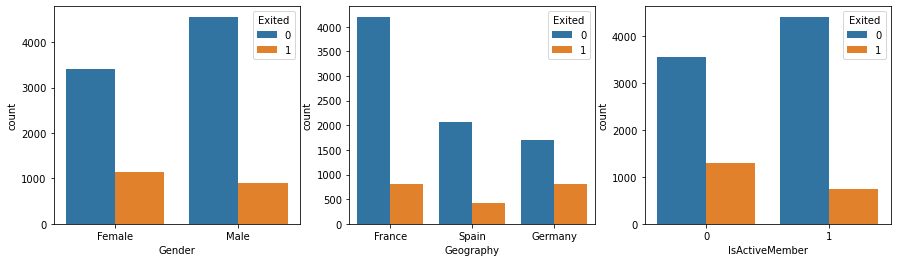

In [8]:
#Analisis of categorical variables
fig, axarr = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[2])

#The more churn is seen among women than men
#Majority of the clients live in France
#Clients who are not active members more frequently have left the bank

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

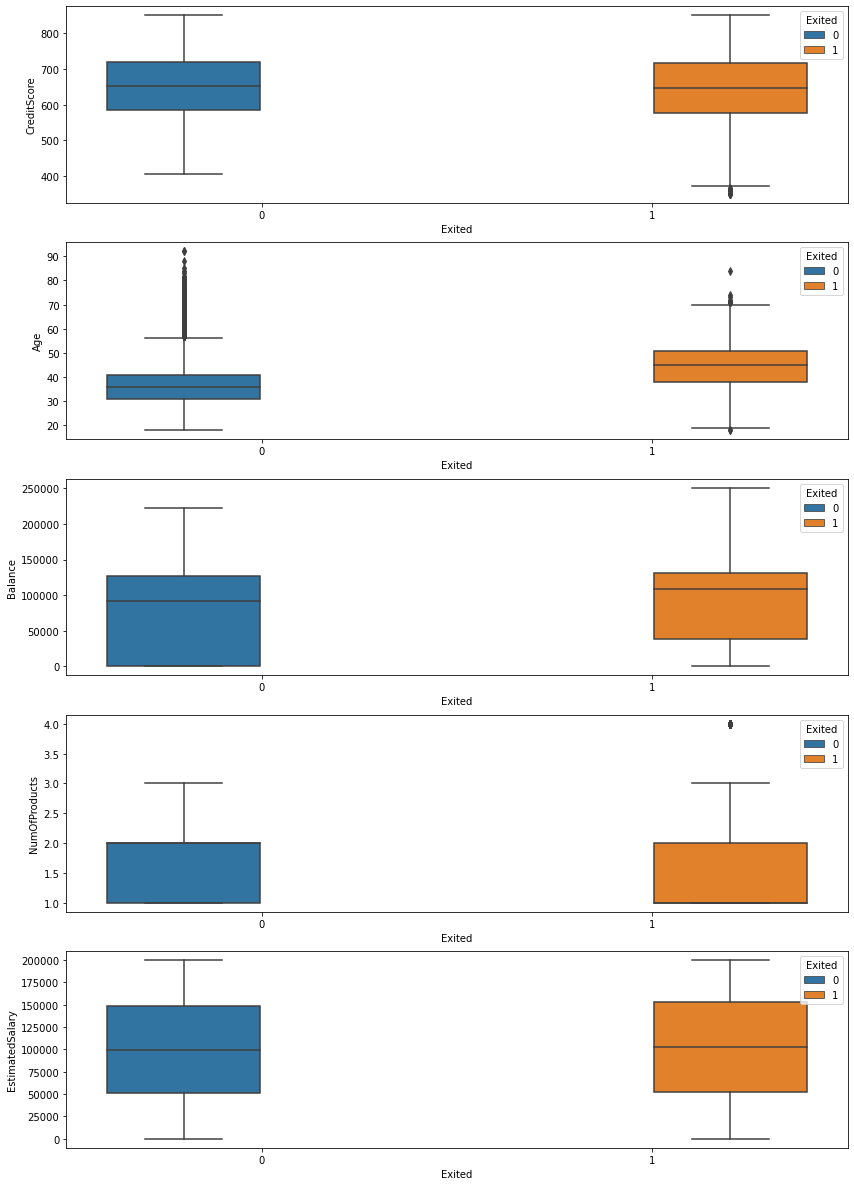

In [9]:
#Analisis of numerical variables
fig, axarr = plt.subplots(5, figsize=(14, 21))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[1])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[3])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[4])

#Credit Score does not have any significant influence on the churn as well as EstimatedSalary and NumOfProducts
#There are more elderly people that have left the bank
#Bank has lost clients with significant cart balance

In [10]:
#Missing values
df.isnull().sum() 

#We do not have any missing walues in the data (HOORAY!)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Statistical summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
#Correlation in the dataset
corr = df.corr()
corr["Exited"].sort_values(ascending=False)

#Exited column does not have strong correlation with the other columns

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [14]:
#Drop the columns RowNumber', 'CustomerId', 'Surname'
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [15]:
#Transform categorical variables into dummies
dfcat = list(df.select_dtypes(include='object').columns)
df = pd.get_dummies(df, columns =  dfcat, drop_first = False)

In [16]:
#Splitting the dataset into Train and Test
X = df.drop(['Exited'],axis = 1)
y = df['Exited'] #Target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# Normalizing the dataset with Standart Scaler
ss = StandardScaler()
x_train_standard = ss.fit_transform(X_train)
x_test_standard = ss.transform(X_test)

In [18]:
#1 Logistic Regression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train_standard, y_train)
pred = logreg.predict(x_test_standard)
proba = logreg.predict_proba(x_test_standard)

In [19]:
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
roc =  roc_auc_score(y_test, proba[:,1])    # Getting the roc_auc Score

In [20]:
results = pd.DataFrame([['Logistic Regression', rec, prec,f1,roc]],
                      columns=['Model', 'Recall_Score','Precision_Score', 'F1_Score', 'Roc_Auc Score'])
results

,Model,Recall_Score,Precision_Score,F1_Score,Roc_Auc Score
0,Logistic Regression,0.228663,0.584362,0.328704,0.771877


In [22]:
#cross validation accuracy for Logistic Regression
cv = cross_val_score(
    estimator=LogisticRegression(),
    X = x_train_standard,
    y =y_train,
    cv =10)

print(f"CV-results: {round(np.mean(cv), 4)} +/- {round(np.std(cv)*100, 3)}")

CV-results: 0.8093 +/- 0.965


In [23]:
#2 Random Forest 
ranfor = RandomForestClassifier(random_state=0)#Creating the Random Forest Classifier Model
ranfor.fit(X_train, y_train)                   #Training the Model with X_train & y_train
pred = ranfor.predict(x_test_standard)


proba = ranfor.predict_proba(x_test_standard)

In [24]:
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
roc =  roc_auc_score(y_test, proba[:,1])    # Getting the roc_auc Score

In [25]:
rf_results = pd.DataFrame([['Random Forest', rec, prec,f1,roc]],
                      columns=['Model', 'Recall_Score','Precision_Score', 'F1_Score', 'Roc_Auc Score'])
results = results.append(rf_results, ignore_index=True)
results

,Model,Recall_Score,Precision_Score,F1_Score,Roc_Auc Score
0,Logistic Regression,0.228663,0.584362,0.328704,0.771877
1,Random Forest,0.896940,0.209320,0.339427,0.562164


In [26]:
#cross validation accuracy for Random Forest 
cv = cross_val_score(
    estimator=RandomForestClassifier(),
    X = x_train_standard,
    y =y_train,
    cv =10)

print(f"CV-results: {round(np.mean(cv), 4)} +/- {round(np.std(cv)*100, 3)}")

CV-results: 0.8603 +/- 0.679


In [27]:
#3 XGBboosting
boost = XGBClassifier(random_state=27)
boost.fit(X_train, y_train)
pred = boost.predict(X_test)
proba = boost.predict_proba(X_test)

In [28]:
rec  = recall_score(y_test, pred)     # Getting the recall Score 
prec = precision_score(y_test, pred)  # Getting the Precision Score
f1   = f1_score(y_test, pred)         # Getting the f1 Score 
roc =  roc_auc_score(y_test, proba[:,1])    # Getting the roc_auc Score


In [29]:
boosting_results = pd.DataFrame([['Boosting', rec, prec,f1,roc]],
                      columns=['Model', 'Recall_Score','Precision_Score', 'F1_Score', 'Roc_Auc Score'])
results = results.append(boosting_results, ignore_index=True)
results

,Model,Recall_Score,Precision_Score,F1_Score,Roc_Auc Score
0,Logistic Regression,0.228663,0.584362,0.328704,0.771877
1,Random Forest,0.896940,0.209320,0.339427,0.562164
2,Boosting,0.510467,0.784653,0.618537,0.878043


In [30]:
#cross validation accuracy for XGBClassifier
cv = cross_val_score(
    estimator=XGBClassifier(),
    X = x_train_standard,
    y =y_train,
    cv =10)

print(f"CV-results: {round(np.mean(cv), 4)} +/- {round(np.std(cv)*100, 3)}")

CV-results: 0.8633 +/- 0.908
